In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
from sklearn.preprocessing import StandardScaler

a = StandardScaler()
a.fit(data)
data_std = a.transform(data)
data1 = pd.DataFrame(data_std)
data1

,0,1,2,3,4,5,6,7,8,9,10
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


{'whiskers': [<matplotlib.lines.Line2D at 0x1c7f5b6f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7f5b6fa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7f5b6f100>,
 'medians': [<matplotlib.lines.Line2D at 0x1c7f5b6ff10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c7f7b84220>,
 'means': []}

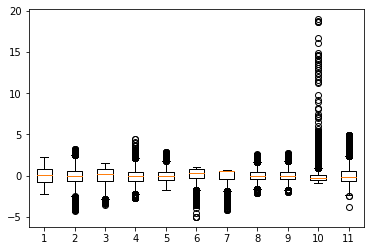

In [4]:
plt.boxplot(data1)

<AxesSubplot:ylabel='Density'>

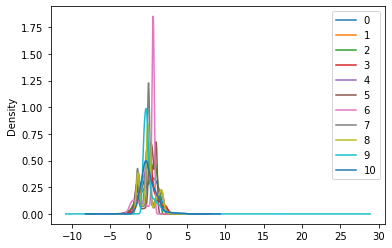

In [5]:
data1.plot(kind='kde')

In [6]:
# splitting our data :- 

X = data1.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
Y = data1.iloc[:,7]

In [7]:
# build our model :-

model = Sequential()

# as this is linear regression problem we have to choose activation function as linear
model.add(layers.Dense(10, input_dim=10, activation='linear'))
model.add(layers.Dense(8, activation='linear'))  # hidder layer
model.add(layers.Dense(1, activation='linear')) 

In [8]:
# now we will compile our model :-

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'] )

In [9]:
model

In [10]:
# now we will fit our data into model and give them parameter :-

model.fit(X,Y,  validation_split=0.3, epochs=300, batch_size=50)

Epoch 1/300
211/211 [==============================] - 3s 8ms/step - loss: 0.0711 - MSE: 0.0711 - val_loss: 0.0031 - val_MSE: 0.0031
Epoch 2/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0024 - MSE: 0.0024 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 3/300
211/211 [==============================] - 1s 6ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 4/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 5/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 6/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 7/300
211/211 [==============================] - 1s 6ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 8/300
211/211 [==============================] - 1s 5ms/step - 

211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 63/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 64/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 65/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 66/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0021 - val_MSE: 0.0021
Epoch 67/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 68/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 69/300
211/211 [==============================] - 1s 4ms/step - loss:

211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 124/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 125/300
211/211 [==============================] - 1s 7ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 126/300
211/211 [==============================] - 2s 10ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 127/300
211/211 [==============================] - 1s 6ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 128/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0027 - val_MSE: 0.0027
Epoch 129/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0021 - val_MSE: 0.0021
Epoch 130/300
211/211 [==============================] - 1s 4ms/step

Epoch 184/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0021 - val_MSE: 0.0021
Epoch 185/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 186/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0021 - MSE: 0.0021 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 187/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0021 - val_MSE: 0.0021
Epoch 188/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0021 - MSE: 0.0021 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 189/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0021 - val_MSE: 0.0021
Epoch 190/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 191/300
211/211 [==============================] 

211/211 [==============================] - 1s 6ms/step - loss: 0.0021 - MSE: 0.0021 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 245/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 246/300
211/211 [==============================] - 1s 6ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 247/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 248/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0021 - MSE: 0.0021 - val_loss: 0.0026 - val_MSE: 0.0026
Epoch 249/300
211/211 [==============================] - 1s 5ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0026 - val_MSE: 0.0026
Epoch 250/300
211/211 [==============================] - 1s 4ms/step - loss: 0.0022 - MSE: 0.0022 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 251/300
211/211 [==============================] - 1s 5ms/step 

In [11]:
score = model.evaluate(X,Y)

470/470 [==============================] - 1s 3ms/step - loss: 0.0022 - MSE: 0.0022


In [12]:
print(model.metrics_names[1])
print(score[1]*100)

MSE
0.2207649638876319


# Tuning Hyerparameter :- Batch size and Epochs

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model():
    model1 = Sequential()
    model1.add(layers.Dense(10, input_dim=10, activation='linear'))
    model1.add(layers.Dense(8, activation='linear'))  # hidder layer
    model1.add(layers.Dense(1, activation='linear'))
    
    #adam = Adam(lr=0.01)
    model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model1

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

##  Total MSE 0.2207